In [158]:
# Load pickled data
import pickle, os

# TODO: Fill this in based on where you saved the training and testing data

training_file =   os.path.join(os.getcwd(), './train.p')
validation_file = os.path.join(os.getcwd(), './valid.p')
testing_file =    os.path.join(os.getcwd(), './test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [159]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import numpy as np
from sklearn.utils import shuffle
# Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples = {0}".format(n_valid))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


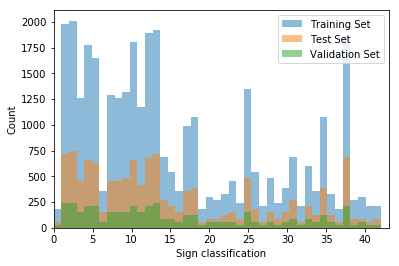

In [160]:
plt.hist(y_train, n_classes, alpha=0.5, label='Training Set')
plt.hist(y_test, n_classes, alpha=0.5, label='Test Set')
plt.hist(y_valid, n_classes, alpha=0.5, label='Validation Set')
plt.xlabel('Sign classification')
plt.ylabel('Count')
plt.xlim(xmin=0, xmax=n_classes)
plt.legend(loc='upper right')
plt.show()

In [161]:
import pandas as pd
sign_names = pd.read_csv('signnames.csv', index_col=0)
sign_names['SignName'][0]

'Speed limit (20km/h)'

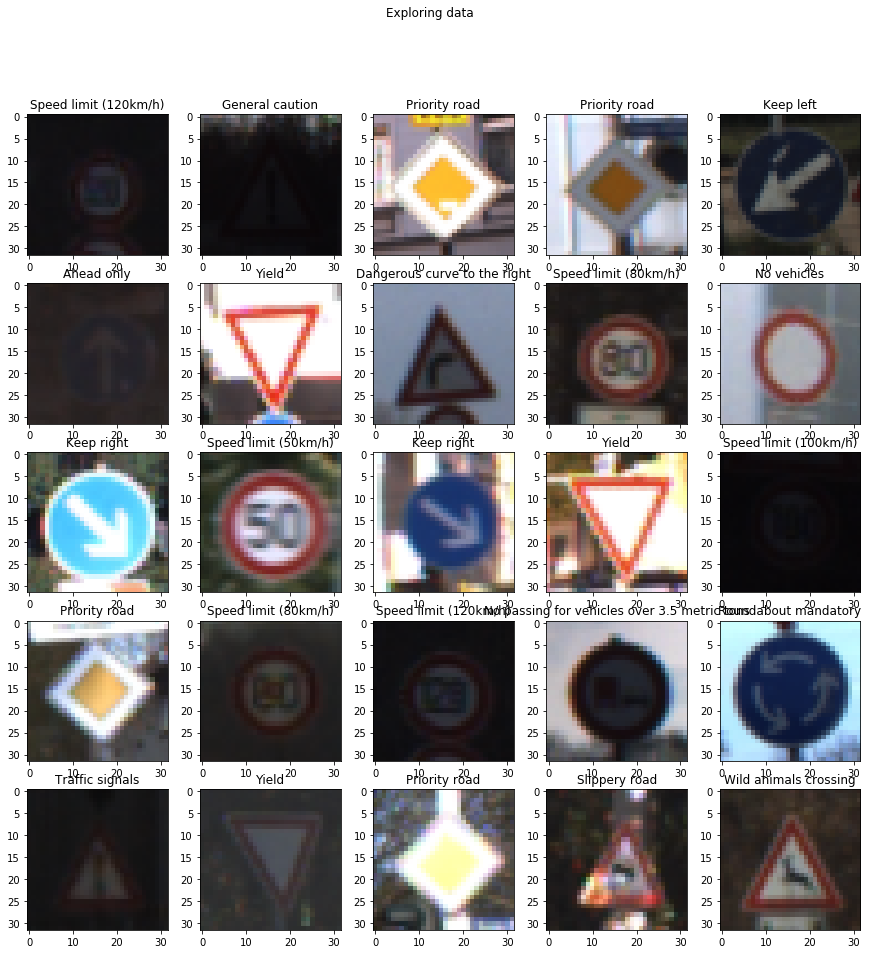

In [162]:
X_train, y_train = shuffle(X_train, y_train)
fig = plt.figure(figsize=(15,15))
fig.suptitle('Exploring data')
for i in range(1,26):
    ax = plt.subplot(5,5,i)
    ax.set_title(sign_names['SignName'][y_train[i]])
    plt.imshow(X_train[i])
plt.show()

In [163]:
def rotate_images(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols))
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols))
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

Dataset rotated +/-15 degrees.


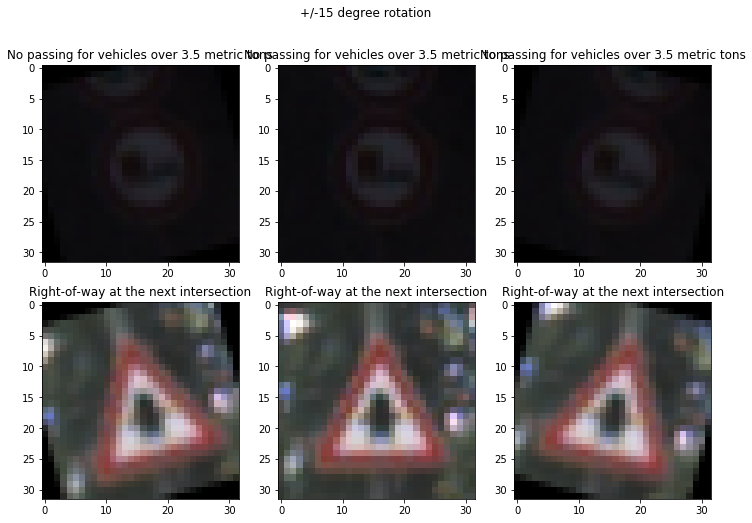

In [164]:
degrees = 15
X_pos, X_neg = rotate_images(X_train, degrees)
X_train, y_train, X_pos, X_neg = shuffle(X_train, y_train, X_pos, X_neg)
fig = plt.figure(figsize=(12,8))
fig.suptitle('+/-{0} degree rotation'.format(degrees))

ax1 = plt.subplot(231)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_pos[0])

ax2 = plt.subplot(232)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax3 = plt.subplot(233)
ax3.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_neg[0])

ax4 = plt.subplot(234)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_pos[1])

ax5 = plt.subplot(235)
ax5.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax6 = plt.subplot(236)
ax6.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_neg[1])
plt.show()

In [165]:
def amplify_contrast(X):
    X_eq = np.copy(X)
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_eq = cv2.equalizeHist(Y)
        YCrCb_eq = cv2.merge((Y_eq, Cr, Cb))
        X_eq[i] = cv2.cvtColor(YCrCb_eq, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized')
    return X_eq

Dataset histogram equalized


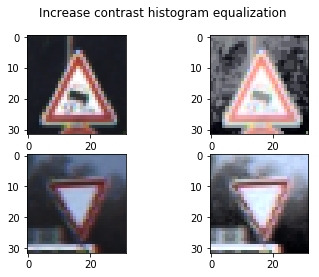

In [166]:
X_histeq = amplify_contrast(X_train)
X_train, y_train, X_histeq = shuffle(X_train, y_train, X_histeq)
fig = plt.figure()
fig.suptitle('Increase contrast histogram equalization')
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_histeq[0])
plt.subplot(223)
plt.imshow(X_train[1])
plt.subplot(224)
plt.imshow(X_histeq[1])
plt.show()

In [167]:
def clahe_contrast(X):
    X_clahe = np.copy(X)
    clahe = cv2.createCLAHE(tileGridSize=(4,4))
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_clahe = clahe.apply(Y)
        YCrCb_clahe = cv2.merge((Y_clahe, Cr, Cb))
        X_clahe[i] = cv2.cvtColor(YCrCb_clahe, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized clahe')
    return X_clahe

Dataset histogram equalized clahe


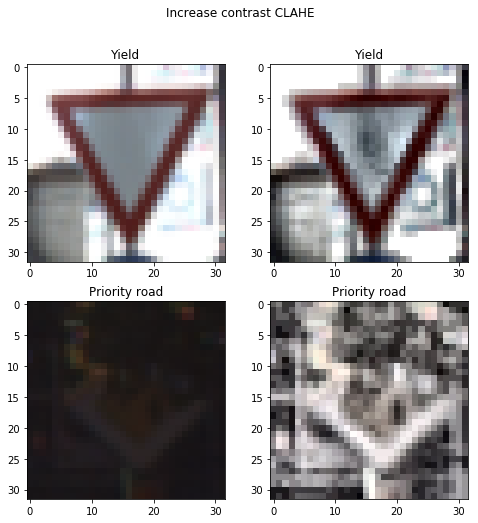

In [168]:
X_clahe = clahe_contrast(X_train)
X_train, y_train, X_clahe = shuffle(X_train, y_train, X_clahe)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Increase contrast CLAHE')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_clahe[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_clahe[1])
plt.show()

In [169]:
def contrast_normalization(X):
    X_conorm = np.copy(X)
    gauss_1 = cv2.getGaussianKernel(5, 1) + np.transpose(cv2.getGaussianKernel(5, 1))
    gauss_2 = cv2.getGaussianKernel(5, 1.6) + np.transpose(cv2.getGaussianKernel(5, 1.6))
    diff_gauss = gauss_1 - gauss_2
    for i in range(X.shape[0]):    
        X_conorm[i] = X[i] + cv2.filter2D(X[i], -1, diff_gauss)
    print('Contrast normalized')
    return X_conorm

Contrast normalized


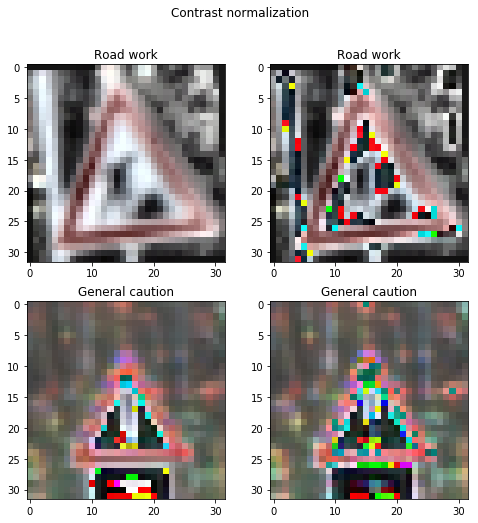

In [173]:
X_conorm = contrast_normalization(X_train)
X_train, y_train, X_conorm = shuffle(X_train, y_train, X_conorm)
fig = plt.figure(figsize=(8,8))
fig.suptitle('Contrast normalization')

ax1 = plt.subplot(221)
ax1.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_train[0])

ax2 = plt.subplot(222)
ax2.set_title(sign_names['SignName'][y_train[0]])
plt.imshow(X_conorm[0])

ax3 = plt.subplot(223)
ax3.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_train[1])

ax4 = plt.subplot(224)
ax4.set_title(sign_names['SignName'][y_train[1]])
plt.imshow(X_conorm[1])
plt.show()

In [174]:
def amplify_dataset(X, y):
    X_rot_pos, X_rot_neg = rotate_images(X, 5)
    X = np.concatenate((X, X_rot_neg, X_rot_pos), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    
    X_histeq = amplify_contrast(X)
    X_clahe = clahe_contrast(X)
    X_conorm = contrast_normalization(X)
    X = np.concatenate((X, X_histeq, X_clahe, X_conorm), axis=0)
    y = np.concatenate((y, y, y, y), axis=0)
    print('Number of examples increased to {0}'.format(X.shape[0]))
    return X, y

In [175]:
X_train, y_train = amplify_dataset(X_train, y_train)

Dataset rotated +/-5 degrees.
Dataset histogram equalized


MemoryError: 

In [67]:
def grayscale(X):
    X_gray = np.copy(X_train[:,:,:,0])
    for i in range(n_train):
        X_gray[i] = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)
    return X_gray

In [68]:
#Normalize the data
def normalize(X):
    X = X.astype('float64') - np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    return X

In [69]:
def preprocess(X):
    X_gray = grayscale(X)
    X_norm = normalize(X_gray)
    return X_norm

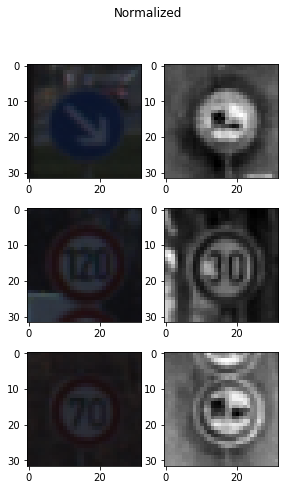

In [83]:
X_norm = preprocess(X_train)
fig = plt.figure(figsize=(4.5,7.5))
fig.suptitle('Normalized')
rows = 3
for i in range(0,rows):
    plt.subplot(rows,2,2*i+1)
    plt.imshow(X_train[i])
    plt.subplot(rows,2,2*i+2)
    plt.imshow(X_gray[i], cmap='gray')
plt.show()